# Tabular Q-learning

Each step is directly used to update the Q table. To smooth changes, a learning rate $\alpha$ is specified.

The Q table updating rule is

$$
Q(s, a) = \alpha Q(s, a) + (1-\alpha) (r_{s, a \rightarrow s'} + \max_{a' \in A} Q(s', a')) 
$$

In [1]:
import gym
import numpy as np
import os
import random
import time
from tqdm import tqdm
from IPython.display import clear_output

In [18]:
episode_num = 100000
timeout_step_num = 100

gamma = 0.99
lr = 0.1

# epsilon greedy params
epsilon_min = 0.01
epsilon_decay = 0.001


In [19]:
env = gym.make('FrozenLake-v0')

action_space_size = env.action_space.n
obs_space_size = env.observation_space.n
q_table = np.zeros((obs_space_size, action_space_size))

def update_q_table():
    q_table[state, action] = (
        (1 - lr) * q_table[state, action] + 
        lr * (reward + gamma * np.max(q_table[new_state, :])))
    
        
def get_epsilon(episode_idx):
    epsilon = epsilon_min + (1 - epsilon_min) * np.exp(- epsilon_decay * episode_idx)
#     if episode_idx % 100 == 0:
#         print(episode_idx, epsilon)
    return epsilon

def get_action():
    if np.random.random() > epsilon:
        action = np.argmax(q_table[state, :])
    else:
        action = np.random.choice(action_space_size)
    return action

episodes_rewards = []

for episode_idx in tqdm(range(episode_num)):
    current_episode_reward = 0
    state = env.reset()
    epsilon = get_epsilon(episode_idx)
    for step_idx in range(timeout_step_num):
        action = get_action()    
        new_state, reward, done, _ = env.step(action)
        
        # update q_table
        update_q_table()
        
        # prepare next step
        current_episode_reward += reward
        state = new_state
        if done:
            break
    episodes_rewards.append(current_episode_reward)
    
print('****updated q_table****')
print(q_table)

100%|██████████| 100000/100000 [01:52<00:00, 885.49it/s]

****updated q_table****
[[0.53693397 0.49302026 0.49848174 0.49773057]
 [0.3427032  0.28019992 0.22657995 0.48454453]
 [0.41767584 0.41021328 0.39067557 0.45499572]
 [0.33369125 0.28683581 0.22377491 0.44266617]
 [0.55226669 0.34808066 0.41529699 0.35287875]
 [0.         0.         0.         0.        ]
 [0.11941961 0.06969405 0.28314372 0.17910228]
 [0.         0.         0.         0.        ]
 [0.29838657 0.4038493  0.32732489 0.58239817]
 [0.39606652 0.61296615 0.40738924 0.30311553]
 [0.54593484 0.28741969 0.34529955 0.33607376]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.4416374  0.59546967 0.69486108 0.62770973]
 [0.74372344 0.86769065 0.75486479 0.72499508]
 [0.         0.         0.         0.        ]]


[0.   0.   0.   ... 0.65 0.55 0.65]


Text(0.5, 1.0, 'winning rate')

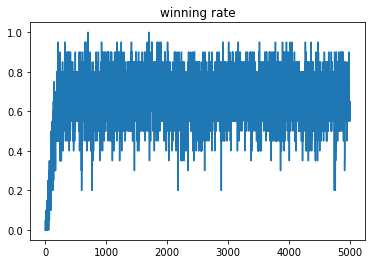

In [20]:
from matplotlib import pylab as plt
%matplotlib inline

episodes_rewards = np.array(episodes_rewards)
episodes_rewards_mean = episodes_rewards.reshape([-1, 20]).mean(axis=1)


# plt.hist(episodes_rewards)
plt.figure()
plt.plot(episodes_rewards_mean)
print(episodes_rewards_mean)
plt.title('winning rate')

## deployment

In [141]:
play_episode_num = 3
success_num = 0

for episode in range(play_episode_num):
    state = env.reset()
    done = False
    
    print('***Episode {}***'.format(episode))
    time.sleep(1)
    clear_output(wait=True)
    for step in range(timeout_step_num):
        env.render()
        time.sleep(0.3)
        clear_output(wait=True)
        action = np.argmax(q_table[state, :])
        new_state, reward, done, _ = env.step(action)
        if done:
            env.render()
            if reward == 1:
                print('Goal Reached!')
                success_num += 1
            else:
                print('Agent Failed!')
            time.sleep(3)
            clear_output(wait=True)
            break
        else:
            state = new_state

print('Success {} out of {}'.format(success_num, play_episode_num))

Success 1 out of 3
